In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [3]:
%load_ext autoreload
%autoreload 2
from preprocessing import *

/home/jlee782/.local/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [9]:
from sklearn import cluster

In [40]:
def compute_jaccard_affinity_matrix(object_id,exclude_lst=[]):
    bb_objects = bb_info[bb_info["object_id"]==object_id]
    worker_lst =  bb_objects.worker_id.unique()
    worker_lst = [w for w in worker_lst if w not in exclude_lst]
    prj_matrix = []
    for idx in worker_lst:
        prj_row =[]
        for jdx in worker_lst:
            #if idx!=jdx :
                worker_BB_polygon = worker_polygon(bb_objects,idx)
                worker_BB_polygon2 = worker_polygon(bb_objects,jdx)
                prj = BB_PRJ(worker_BB_polygon,worker_BB_polygon2)
                prj_row.append(prj[2])
        prj_matrix.append(prj_row)
    prj_matrix = np.array(prj_matrix)
    worker_lst=np.array(worker_lst)
    return prj_matrix,worker_lst

In [90]:
spectral = cluster.SpectralClustering(
        n_clusters=2, eigen_solver='arpack',
        affinity="precomputed")

obj=8
aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)

In [80]:
tmp_arr = []
for row in aff_mat:
    tmp_arr.append(sum(row))
diag = np.eye(len(tmp_arr))
for i in range(len(tmp_arr)):
    diag[i][i] = tmp_arr[i]
lapl = np.zeros_like(diag)
lapl = diag - aff_mat

In [81]:
diag - aff_mat

array([[ 30.5477075 ,  -0.87259484,  -0.7859518 , ...,  -0.82135384,
         -0.76644426,  -0.89283909],
       [ -0.87259484,  31.25112523,  -0.82752188, ...,  -0.8887299 ,
         -0.82024774,  -0.87417779],
       [ -0.7859518 ,  -0.82752188,  31.57333122, ...,  -0.91307618,
         -0.87867299,  -0.831884  ],
       ..., 
       [ -0.82135384,  -0.8887299 ,  -0.91307618, ...,  32.46489129,
         -0.90642827,  -0.88366067],
       [ -0.76644426,  -0.82024774,  -0.87867299, ...,  -0.90642827,
         31.49018843,  -0.82259832],
       [ -0.89283909,  -0.87417779,  -0.831884  , ...,  -0.88366067,
         -0.82259832,  31.62908349]])

In [82]:
eigenval = np.linalg.eigvals(lapl)

In [96]:
eigenval

array([ -3.55271368e-15,   1.99318674e+01,   2.73202429e+01,
         2.88852039e+01,   2.93507927e+01,   3.01006530e+01,
         3.02995348e+01,   3.04854440e+01,   3.05461934e+01,
         3.07989699e+01,   3.10060103e+01,   3.10402118e+01,
         3.34419685e+01,   3.33396735e+01,   3.12750331e+01,
         3.13270426e+01,   3.13730775e+01,   3.14224356e+01,
         3.15624741e+01,   3.31299385e+01,   3.19089625e+01,
         3.29369901e+01,   3.19936661e+01,   3.28572781e+01,
         3.27924239e+01,   3.20528099e+01,   3.21193644e+01,
         3.21697131e+01,   3.22248932e+01,   3.26406629e+01,
         3.26044683e+01,   3.23075003e+01,   3.23527154e+01,
         3.24071459e+01,   3.24238323e+01,   3.24539143e+01,
         3.25382378e+01,   3.25243697e+01,   3.25060131e+01,
         0.00000000e+00])

obj 47 (3 cluster)

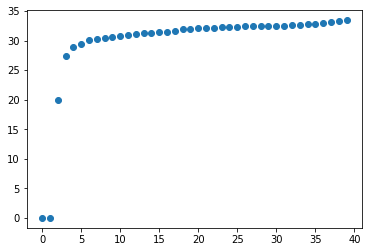

In [83]:
plt.plot(sorted(eigenval),'o')

obj 30 (2 cluster)

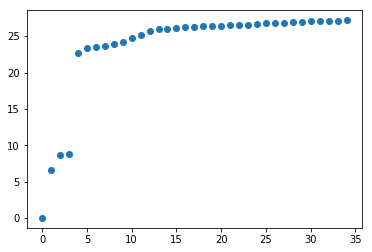

In [78]:
plt.plot(sorted(eigenval),'o')

obj 31 (3 cluster)

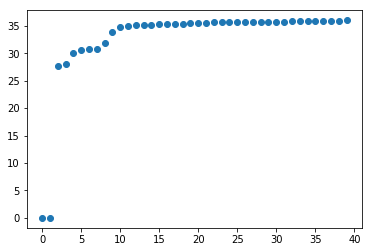

In [73]:
plt.plot(sorted(eigenval),'o')

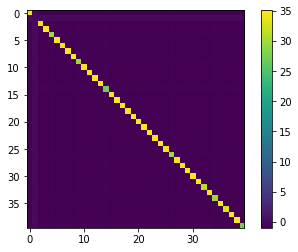

In [62]:
plt.imshow(lapl)
plt.colorbar()

In [92]:
labels = spectral.fit_predict(aff_mat)

In [93]:
labels

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

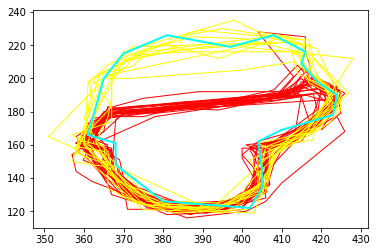

In [94]:
bb_objects = bb_info[bb_info["object_id"]==obj]
plt.figure()
colors = ["red","yellow","blue"]
for i,ylabel in enumerate(list(set(labels))):
    workers_in_cluster = np.where(labels==ylabel)[0]
    for widx in workers_in_cluster:
        plot_coords(worker_polygon(bb_objects,worker_lst[widx]),reverse_xy=True,color=colors[i],fill_color="")
plot_coords(ground_truth_T(obj),color="cyan",fill_color="",reverse_xy=True,lw=2)

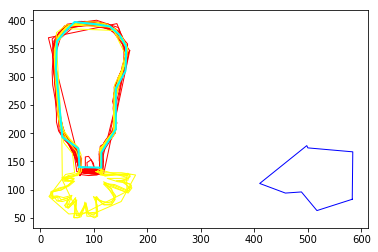

In [56]:
bb_objects = bb_info[bb_info["object_id"]==obj]
plt.figure()
colors = ["red","yellow","blue"]
for i,ylabel in enumerate(list(set(labels))):
    workers_in_cluster = np.where(labels==ylabel)[0]
    for widx in workers_in_cluster:
        plot_coords(worker_polygon(bb_objects,worker_lst[widx]),reverse_xy=True,color=colors[i],fill_color="")
plot_coords(ground_truth_T(obj),color="cyan",fill_color="",reverse_xy=True,lw=2)

In [ ]:
obj=8
aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)